In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

shear_range = distorting image
rescale=1./255-- transform every pixel value from range [0,255] -> [0,1]


In [4]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Smart Bridge - AI DS course/Assignment /Ass 4- CNN/Animal/train",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Smart Bridge - AI DS course/Assignment /Ass 4- CNN/Animal/test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 7955 images belonging to 70 classes.
Found 704 images belonging to 70 classes.


In [5]:
print(x_train.class_indices)

{'Afghan': 0, 'African Wild Dog': 1, 'Airedale': 2, 'American Hairless': 3, 'American Spaniel': 4, 'Basenji': 5, 'Basset': 6, 'Beagle': 7, 'Bearded Collie': 8, 'Bermaise': 9, 'Bichon Frise': 10, 'Blenheim': 11, 'Bloodhound': 12, 'Bluetick': 13, 'Border Collie': 14, 'Borzoi': 15, 'Boston Terrier': 16, 'Boxer': 17, 'Bull Mastiff': 18, 'Bull Terrier': 19, 'Bulldog': 20, 'Cairn': 21, 'Chihuahua': 22, 'Chinese Crested': 23, 'Chow': 24, 'Clumber': 25, 'Cockapoo': 26, 'Cocker': 27, 'Collie': 28, 'Corgi': 29, 'Coyote': 30, 'Dalmation': 31, 'Dhole': 32, 'Dingo': 33, 'Doberman': 34, 'Elk Hound': 35, 'French Bulldog': 36, 'German Sheperd': 37, 'Golden Retriever': 38, 'Great Dane': 39, 'Great Perenees': 40, 'Greyhound': 41, 'Groenendael': 42, 'Irish Spaniel': 43, 'Irish Wolfhound': 44, 'Japanese Spaniel': 45, 'Komondor': 46, 'Labradoodle': 47, 'Labrador': 48, 'Lhasa': 49, 'Malinois': 50, 'Maltese': 51, 'Mex Hairless': 52, 'Newfoundland': 53, 'Pekinese': 54, 'Pit Bull': 55, 'Pomeranian': 56, 'Poodl

In [6]:
model=Sequential()

In [7]:
#adding convolution layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [8]:
#adding max pooling layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
#input layer of ann
model.add(Flatten())

In [10]:
#add hidden layer(no.of neurons,activation=relu,weights)
model.add(Dense(units=128,activation="relu"))

In [17]:
#add output layer(no.of output classes=5,activation function=softmax)
model.add(Dense(units=70,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
_________________________________________________________________
dense_2 (Dense)              (None, 70)                420       
Total params: 3,938,345
Trainable params: 3,938,345
Non-trainable params: 0
______________________________________________

In [19]:
#configure the learning process(loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
model.fit(x_train,steps_per_epoch=47, epochs=3,validation_data=x_test,validation_steps=20)

Epoch 1/3
47/47 [==============================] - 540s 12s/step - loss: 4.2589 - accuracy: 0.0146 - val_loss: 4.2599 - val_accuracy: 0.0141
Epoch 2/3
47/47 [==============================] - 303s 6s/step - loss: 4.2586 - accuracy: 0.0174 - val_loss: 4.2585 - val_accuracy: 0.0141
Epoch 3/3
47/47 [==============================] - 245s 5s/step - loss: 4.2540 - accuracy: 0.0153 - val_loss: 4.2596 - val_accuracy: 0.0125


steps_per_epoch=no.of images in train data/batch_size  =1495/32 = 46.71 (47),

validation steps=no.of images in test data/batch _size = 640/32 =20


In [21]:
model.save("/content/drive/MyDrive/Smart Bridge - AI DS course/Assignment /Ass 4- CNN/animal.h5")

In [44]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as numpy


In [23]:
model=load_model("/content/drive/MyDrive/Smart Bridge - AI DS course/Assignment /Ass 4- CNN/animal.h5")

In [45]:
img=image.load_img("/content/drive/MyDrive/Smart Bridge - AI DS course/Assignment /Ass 4- CNN/25.jpg",target_size=(64,64))

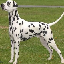

In [46]:
img

In [47]:
x=image.img_to_array(img) #convert to array format - preprocess

In [48]:
x.shape

(64, 64, 3)

In [49]:
#expand dimensions to 4 since cnn takes 4 dimensions
import numpy as np
x=np.expand_dims(x,axis=0)

In [50]:
x.shape  #1 represents batch size, width,height, channels

(1, 64, 64, 3)

In [51]:
x_train.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

In [52]:
import tensorflow as tf #to check tensorflow version
tf.__version__


'2.6.0'

In [53]:
pred=np.argmax(model)

In [54]:
pred

0

In [55]:
x_train.class_indices

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

In [56]:
y=model.predict(x)
pred=np.argmax(y, axis=1)
y

array([[0.0145518 , 0.01283933, 0.01458395, 0.01458738, 0.01270515,
        0.0113199 , 0.01856515, 0.01824524, 0.01428839, 0.01791497,
        0.01778558, 0.01112558, 0.01316877, 0.0116054 , 0.01459203,
        0.01172768, 0.01145097, 0.01195136, 0.01384678, 0.0135956 ,
        0.01576155, 0.01234372, 0.01621017, 0.01585802, 0.01658461,
        0.01702842, 0.01167564, 0.01636677, 0.0123686 , 0.01292222,
        0.01310722, 0.0150838 , 0.01218644, 0.01455694, 0.01579066,
        0.01555127, 0.01223489, 0.01130368, 0.01660625, 0.01539146,
        0.01647589, 0.01606656, 0.01194971, 0.01245323, 0.01546214,
        0.01157678, 0.0161344 , 0.01661119, 0.0183097 , 0.01516493,
        0.01263486, 0.01566964, 0.01659364, 0.01317663, 0.01370563,
        0.01229238, 0.01681778, 0.01409626, 0.01289565, 0.01410685,
        0.01446519, 0.01556638, 0.01224   , 0.01191128, 0.01208231,
        0.01586477, 0.01689307, 0.01176939, 0.01616274, 0.01146766]],
      dtype=float32)

In [57]:
pred

array([6])